# Análisis de un ecommerce de moda anónimo

## Introducción

Este notebook está basado en el dataset de Kaggle "Women's E-Commerce Clothing Reviews".
Los ficheros están descargados en esta misma carpeta y contienen información sobre los comentarios que los clientes han hecho de las prendas de ropa femenina de una página web anónima. En el fichero se incluye, entre otros, información sobre el tipo de prenda, las categorías a las que pertenece, el comentario del cliente, la valoración del producto y si lo recomienda.


El objetivo de este notebook es entender cómo es esta tienda online, sus clientes, sus productos y las relaciones que hay entre ellos a través de los comentarios y las recomendaciones.


## Carga de datos

Importo las librerías y cargo el fichero .csv

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "terrain"
palette = plt.get_cmap('terrain')
import seaborn as sns
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix,\
                            classification_report, auc, roc_curve


import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")



Revisión previa de los datos del dataset y sus características: tipo de datos, columnas, datos que faltan, estadísticos básicos...

In [3]:
df_completo=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [4]:
df_completo

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [4]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
df_completo.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

De la información inicial tomo algunas notas que me serán de utilidad durante el análisis:

In [ ]:
'''

RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):

 N   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 --> Borrable
 1   Clothing ID              23486 non-null  int64 --> 1206 únicos
 2   Age                      23486 non-null  int64 --> agrupar
 3   Title                    19676 non-null  object --> faltan 3810
 4   Review Text              22641 non-null  object --> faltan 845
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object --> faltan 14
 9   Department Name          23472 non-null  object --> faltan 14
 10  Class Name               23472 non-null  object --> faltan 14
'''

In [5]:
# Informe con datos básicos

def data_report(df):
    # Sacamos los NOMBRES
    cols=pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types=pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS (porcentaje de missings)  df.isnull().sum()->num. missing en la col
    percent_missings=round(df.isnull().sum()*100/len(df),2)
    percent_missings_df=pd.DataFrame(percent_missings.values, columns=["MISSINGS %"])

    # Sacamos los VALORES UNICOS
    unicos=pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin=round(unicos["UNIQUE_VALUES"]*100/len(df),2)

    percent_cardin_df=pd.DataFrame(percent_cardin.values, columns=["CARDIN %"]) # para detectar identificadores (alta cardinalidad en categóricas)
    
    # UNIMOS
    concatenado=pd.concat([cols,types,percent_missings_df,unicos,percent_cardin_df], axis=1)
    concatenado.set_index("COL_N", drop=True, inplace=True)
    
    return concatenado.T  #hace la traspuesta

        
data_report(df_completo)

COL_N,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
DATA_TYPE,int64,int64,int64,object,object,int64,int64,int64,object,object,object
MISSINGS %,0,0,0,16.22,3.6,0,0,0,0.06,0.06,0.06
UNIQUE_VALUES,23486,1206,77,13993,22634,5,2,82,3,6,20
CARDIN %,100,5.13,0.33,59.58,96.37,0.02,0.01,0.35,0.01,0.03,0.09


In [6]:
# Borro columna "Unnamed: 0", no la necesito
df_completo.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
# como el objetivo es tratar el sentimiento de los reviews, decido eliminar los registros que no tienen información 
# en el campo "Review Text"

df_completo=df_completo[df_completo["Review Text"].notnull()]
df_completo["Review Text"].isnull().sum()

0

## Separación train/test
Este ejercicio de análisis está basado en un trabajo previo de machine learning por lo que aunque en esta ocasión no es necesario hacer la separación en train/test, se ha respetado este apartado de modo que los resultados que se obtengan en esta evaluación puedan emplearse en ambos proyectos.

Antes de empezar a tratar los datos, separo en train y test (80/20). De esta forma, si fuera necesario completar datos que faltan o escalar, podré hacerlo calculando sobre train y sin contaminar las muestras en test.

Primero trabajaré con train y después aplicaré sobre test los mismos procesos. Por ejemplo, en caso de rellenar datos, buscaré las medias/modas de train y lo aplicaré en ambos bloques.

In [8]:
train_dataset = df_completo.sample(frac=0.8, random_state=42)
test_dataset = df_completo.drop(train_dataset.index)  # dejo en test los que no están en train
print("tamaño dataset train:",train_dataset.shape)
print("tamaño dataset test:",test_dataset.shape)

tamaño dataset train: (18113, 10)
tamaño dataset test: (4528, 10)


In [9]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18113 entries, 13365 to 20494
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18113 non-null  int64 
 1   Age                      18113 non-null  int64 
 2   Title                    15745 non-null  object
 3   Review Text              18113 non-null  object
 4   Rating                   18113 non-null  int64 
 5   Recommended IND          18113 non-null  int64 
 6   Positive Feedback Count  18113 non-null  int64 
 7   Division Name            18104 non-null  object
 8   Department Name          18104 non-null  object
 9   Class Name               18104 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.5+ MB


In [11]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4528 entries, 9 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              4528 non-null   int64 
 1   Age                      4528 non-null   int64 
 2   Title                    3930 non-null   object
 3   Review Text              4528 non-null   object
 4   Rating                   4528 non-null   int64 
 5   Recommended IND          4528 non-null   int64 
 6   Positive Feedback Count  4528 non-null   int64 
 7   Division Name            4524 non-null   object
 8   Department Name          4524 non-null   object
 9   Class Name               4524 non-null   object
dtypes: int64(5), object(5)
memory usage: 389.1+ KB


## Tratamiento de missings
Las columnas que tienen faltas en sus datos son "Title", "Division Name", "Department Name" y "Class Name". Para estas últimas, al ser categóricas, haremos un tratamiento en bloque con los valores de la moda. Los registros sin título los analizaremos después

In [12]:
# comprobamos que cuando falta "Division Name" tampoco están "Department Name" ni "Class Name"
train_dataset[train_dataset["Division Name"].isnull()]   

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
22997,136,47,"Charcoal, pale gray, a bit of silver!","These socks are soft and comfortable, and they...",5,1,1,NaN,NaN,NaN
23011,136,36,Super socks,I love these little socks ? and the dots spark...,5,1,0,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
21532,665,43,So worth it!,Got these on sale...absolutely love eberjey! f...,5,1,0,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN


In [13]:
# Estos son los identificadores de las prendas que no tienen categoría en esa review. 
# ¿Tendrán esos identificadores más comentarios válidos de los que podamos obtener ese dato?
lista_faltan=train_dataset[train_dataset["Division Name"].isnull()]["Clothing ID"]
lista_faltan=list(lista_faltan)
lista_faltan

[152, 152, 136, 136, 492, 665, 184, 492, 772]

In [14]:
# df solamente con los códigos "Clothing ID" que faltan
# Comprobamos que los "Clothing ID" que no están bien catalogados no tienen otras reviews de las que sacar sus datos

df_falta_div=train_dataset[train_dataset["Clothing ID"].isin(lista_faltan)]
print(df_falta_div.info())
print()
df_falta_div

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 16216 to 20088
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              9 non-null      int64 
 1   Age                      9 non-null      int64 
 2   Title                    9 non-null      object
 3   Review Text              9 non-null      object
 4   Rating                   9 non-null      int64 
 5   Recommended IND          9 non-null      int64 
 6   Positive Feedback Count  9 non-null      int64 
 7   Division Name            0 non-null      object
 8   Department Name          0 non-null      object
 9   Class Name               0 non-null      object
dtypes: int64(5), object(5)
memory usage: 792.0+ bytes
None



,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
22997,136,47,"Charcoal, pale gray, a bit of silver!","These socks are soft and comfortable, and they...",5,1,1,NaN,NaN,NaN
23011,136,36,Super socks,I love these little socks ? and the dots spark...,5,1,0,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
21532,665,43,So worth it!,Got these on sale...absolutely love eberjey! f...,5,1,0,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN


In [15]:
# ¿cuáles son los valores más populares para esas columnas? Con ellos completaremos los NaN
print("mode para Division Name:",train_dataset['Division Name'].mode()[0])
print("mode para Department Name:",train_dataset['Department Name'].mode()[0])
print("mode para Class Name:",train_dataset['Class Name'].mode()[0])

mode para Division Name: General
mode para Department Name: Tops
mode para Class Name: Dresses


In [16]:
# relleno "Division Name","Department Name" y "Class Name" de los registros que faltan con sus modas de train

train_dataset['Division Name'] = train_dataset['Division Name'].fillna(train_dataset["Division Name"].mode()[0])
train_dataset['Department Name'] = train_dataset['Department Name'].fillna(train_dataset["Department Name"].mode()[0])
train_dataset['Class Name'] = train_dataset['Class Name'].fillna(train_dataset["Class Name"].mode()[0])

# en test relleno también con los mismos valores de train
test_dataset['Division Name'] = test_dataset['Division Name'].fillna(train_dataset["Division Name"].mode()[0])
test_dataset['Department Name'] = test_dataset['Department Name'].fillna(train_dataset["Department Name"].mode()[0])
test_dataset['Class Name'] = test_dataset['Class Name'].fillna(train_dataset["Class Name"].mode()[0])

# y comprobamos que ya no hay "nan"
print("null en train:", train_dataset["Division Name"].isnull().sum())
print("null en test:", test_dataset["Division Name"].isnull().sum())

null en train: 0
null en test: 0


In [17]:
# Comprobamos uno de los registros que tenía faltas
train_dataset.iloc[13768]

Clothing ID                                                             1078
Age                                                                       39
Title                                                Nice casual tunic-dress
Review Text                Comfortable,t eh fabric is very soft. the embr...
Rating                                                                     5
Recommended IND                                                            1
Positive Feedback Count                                                    2
Division Name                                                 General Petite
Department Name                                                      Dresses
Class Name                                                           Dresses
Name: 822, dtype: object

In [20]:
# compruebo los estadísticos de train

In [16]:
data_report(train_dataset)  

COL_N,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
DATA_TYPE,int64,int64,int64,object,object,int64,int64,int64,object,object,object
MISSINGS %,0,0,0,13.07,0,0,0,0,0,0,0
UNIQUE_VALUES,18113,1086,77,11433,18109,5,2,75,3,6,20
CARDIN %,100,6,0.43,63.12,99.98,0.03,0.01,0.41,0.02,0.03,0.11


Quedan algunos registros con "Title" sin dato, pero decido no actuar sobre ellos, porque cuando empiece el tratamiento de los textos voy a unir las columnas title y review_text en una única columna

In [17]:
# compruebo los estadísticos de los no numéricos
train_dataset.describe(include=['category',"object"])

,Title,Review Text,Division Name,Department Name,Class Name
count,15745,18113,18113,18113,18113
unique,11433,18109,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,106,2,10707,8047,4905


## Tratamiento de edades
Voy a ver con más detalle cómo son las edades del conjunto, ya que es muy probable que para el análisis exploratirio sea más útil tener grupos de edad que datos individuales.
Para agrupar veré si bloques por décadas es lo más adecuado.

In [18]:
train_dataset["Age"].unique()

array([24, 63, 42, 39, 44, 47, 40, 36, 41, 31, 67, 38, 49, 74, 57, 58, 50,
       29, 46, 26, 35, 43, 65, 33, 60, 52, 28, 45, 51, 34, 48, 25, 32, 30,
       20, 76, 55, 22, 53, 62, 75, 23, 54, 66, 37, 21, 64, 73, 61, 56, 89,
       27, 69, 78, 59, 68, 72, 70, 79, 71, 83, 77, 19, 94, 81, 91, 85, 82,
       86, 93, 99, 92, 18, 90, 80, 84, 87])

In [19]:
train_dataset["Age"].sort_values()

22364    18
8858     18
19704    18
22390    18
3764     19
         ..
14997    92
17578    93
18036    94
18563    94
8327     99
Name: Age, Length: 18113, dtype: int64

In [18]:
# Convertir edad en grupos de edades: hasta 29, 30-39, 40-49, 50 ó más (senior)
bins=[17,29,39,49,99]
labels=["20s","30s","40s","senior"]
train_dataset['age_group']=pd.cut(train_dataset['Age'],bins,labels=labels)

## Análisis gráfico

Represento las variables de forma individual o agrupadas, de forma que pueda ver su comportamiento, tamaño, distribución de valores, etc.

Primero hago un análisis univariante y después bivariante combinando datos.

### Gráficas básicas univariantes

Represento cada una de las variables del dataset escogiendo el tipo de gráficad que mejor se adapte a su tipología.
Comienzo con un vistazo general a los histogramas de todas las variables numéricas en su conjunto.

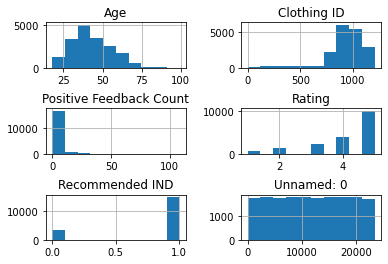

In [21]:
# histogramas de las variables numéricas
train_dataset.hist()
plt.subplots_adjust(hspace=0.9, wspace=0.4)
plt.show();

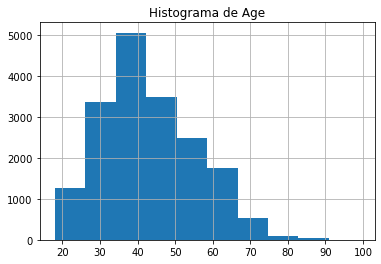

In [30]:
train_dataset["Age"].hist()
plt.title("Histograma de Age");

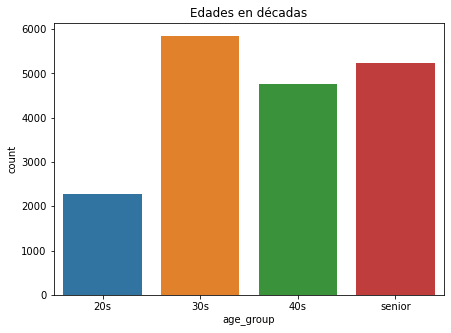

In [22]:
# Gráfica: Reparto de edades en grupos por décadas
plt.figure(figsize=(7,5))
#sns.countplot(train_dataset['age_group'], palette="terrain")
sns.countplot(train_dataset['age_group'])
plt.title("Edades en décadas");

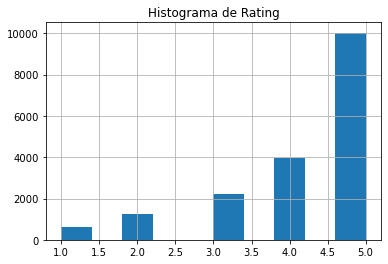

In [32]:
train_dataset["Rating"].hist()
plt.title("Histograma de Rating");

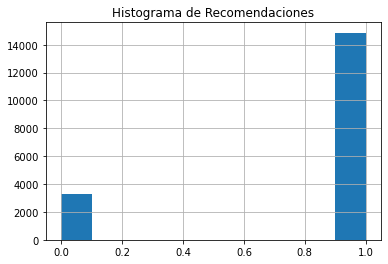

In [33]:
train_dataset["Recommended IND"].hist()
plt.title("Histograma de Recomendaciones");

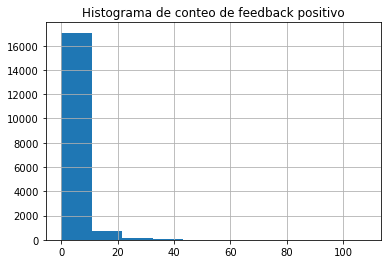

In [34]:
train_dataset["Positive Feedback Count"].hist()
plt.title("Histograma de conteo de feedback positivo");

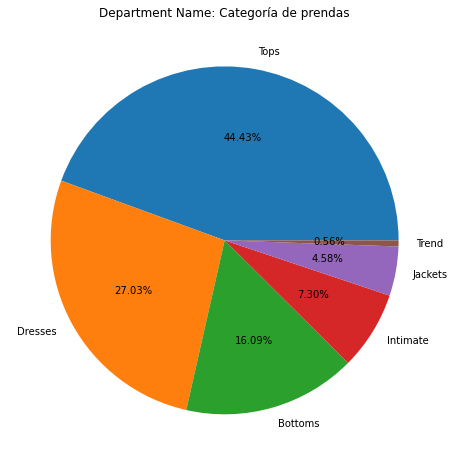

In [206]:
# Gráfica: Categorías de prendas
departamentos=train_dataset["Department Name"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(departamentos.values,
        labels=departamentos.index,
        autopct='%1.2f%%')
p=plt.gcf()
plt.title("Department Name: Categoría de prendas")
plt.show()

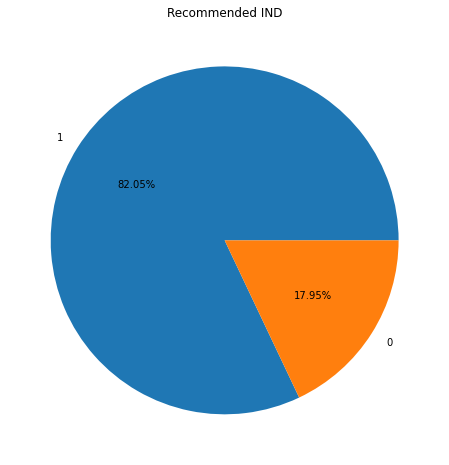

In [36]:
# Gráfica: Porcentaje de recomendaciones
departamentos=train_dataset["Recommended IND"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(departamentos.values,
        labels=departamentos.index,
        autopct='%1.2f%%')
p=plt.gcf()
plt.title("Recommended IND")
plt.show()

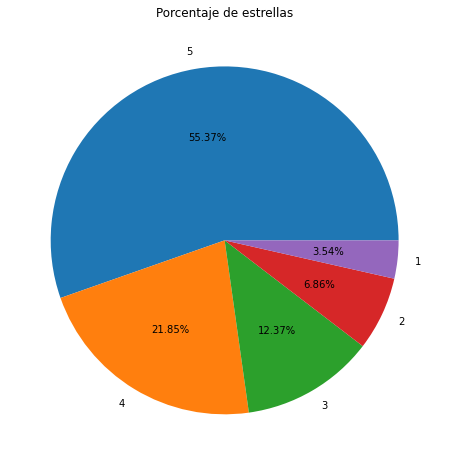

In [96]:
# nuevo
# Gráfica: Porcentaje de estrellas
departamentos=train_dataset["Rating"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(departamentos.values,
        labels=departamentos.index,
        autopct='%1.2f%%')
p=plt.gcf()
plt.title("Porcentaje de estrellas")
plt.show()

In [ ]:
# nuevo


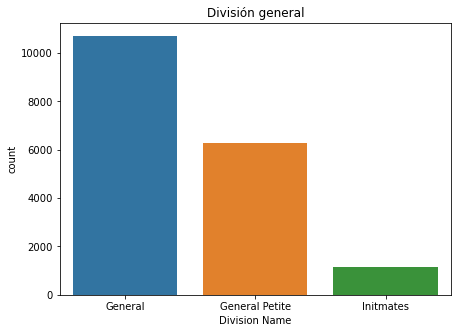

In [37]:
# Gráfica: División en grupos generales de tipos de prendas
plt.figure(figsize=(7,5))
sns.countplot(train_dataset['Division Name'].sort_values(ascending=True))
plt.title("División general");

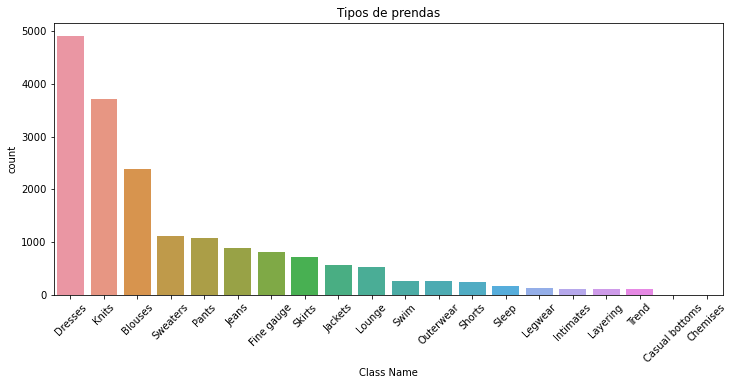

In [23]:
# gráfica: Tipos de prendas y su cantidad
plt.figure(figsize=(12,5))
sns.countplot(train_dataset['Class Name'], order = train_dataset['Class Name'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Tipos de prendas");

In [24]:
# NUEVO
# Recuento de tipos de prenda
train_dataset['Class Name'].value_counts()

Dresses           4905
Knits             3716
Blouses           2381
Sweaters          1123
Pants             1076
Jeans              880
Fine gauge         818
Skirts             718
Jackets            573
Lounge             533
Swim               265
Outerwear          257
Shorts             240
Sleep              176
Legwear            121
Intimates          120
Layering           107
Trend              102
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64

In [31]:
# Nuevo
# Porcentajes tipos de prenda
train_dataset['Class Name'].value_counts()*100/len(train_dataset)


Dresses           27.079998
Knits             20.515652
Blouses           13.145255
Sweaters           6.199967
Pants              5.940485
Jeans              4.858389
Fine gauge         4.516093
Skirts             3.964004
Jackets            3.163474
Lounge             2.942638
Swim               1.463038
Outerwear          1.418870
Shorts             1.325015
Sleep              0.971678
Legwear            0.668028
Intimates          0.662508
Layering           0.590736
Trend              0.563131
Casual bottoms     0.005521
Chemises           0.005521
Name: Class Name, dtype: float64

In [32]:
# nuevo
# recuento de clasificación de prendas
train_dataset["Department Name"].value_counts()



Tops        8047
Dresses     4896
Bottoms     2915
Intimate    1323
Jackets      830
Trend        102
Name: Department Name, dtype: int64

In [33]:
# nuevo
# qué tipo de categorías corresponden a las prendas knits
train_dataset[train_dataset["Class Name"]=="Knits"]["Department Name"].value_counts()

Tops    3716
Name: Department Name, dtype: int64

In [57]:
# nuevo
# qué tipo de prendas hay en cada categoría 
#train_dataset.groupby(["Department Name","Class Name"].size())
train_dataset.groupby(by=["Department Name","Class Name"],sort=True).size()

Department Name  Class Name    
Bottoms          Casual bottoms       1
                 Jeans              880
                 Pants             1076
                 Shorts             240
                 Skirts             718
Dresses          Dresses           4896
Intimate         Chemises             1
                 Intimates          120
                 Layering           107
                 Legwear            121
                 Lounge             533
                 Sleep              176
                 Swim               265
Jackets          Jackets            573
                 Outerwear          257
Tops             Blouses           2381
                 Dresses              9
                 Fine gauge         818
                 Knits             3716
                 Sweaters          1123
Trend            Trend              102
dtype: int64

### Gráficas básicas bivariantes

Comenzando por una comparación 2 a 2 mediante un pairplot y siguiendo por las relaciones entre 2 variables que puedan aportar información para entender el comportamiento del cliente. Por ejemplo, cómo son las recomendaciones con respecto a los grupos de edad, qué prendas son mejor valoradas o cómo se relacionan recomendaciones y valoración del producto (rating). Finalmente, con una matriz de correlación, comprobaremos si hay relación directa proporcional (o inversa) entre dos variables.

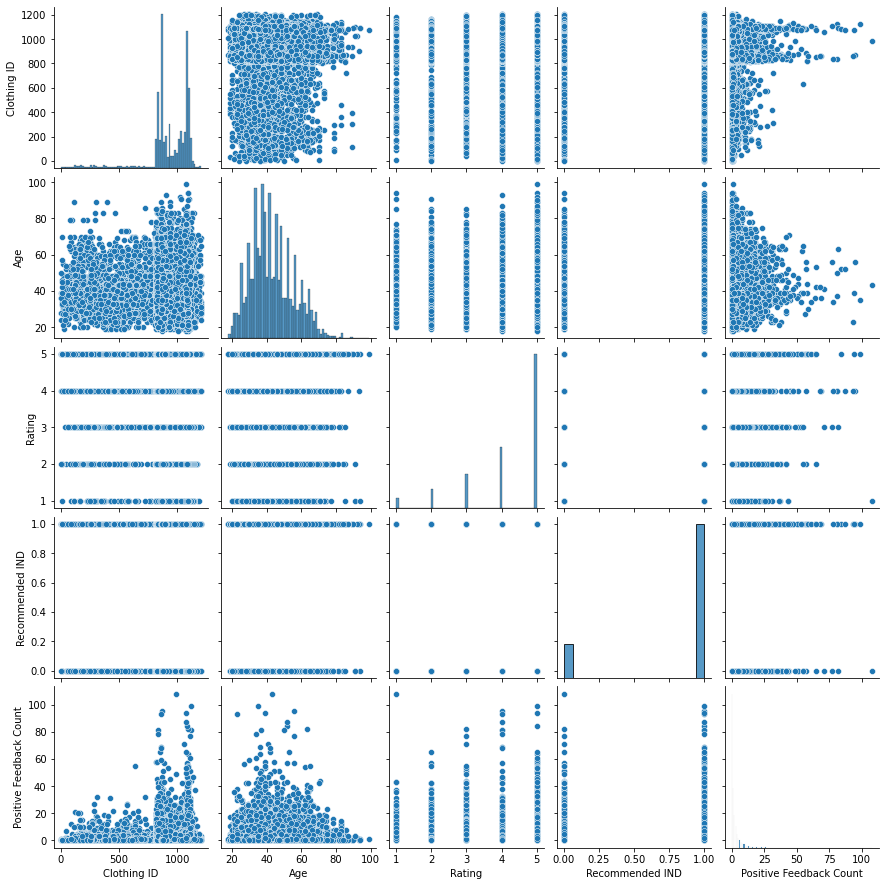

In [40]:
# gráfica: cuantitativas relacionadas 2 a 2 y sus histogramas
sns.pairplot(train_dataset);


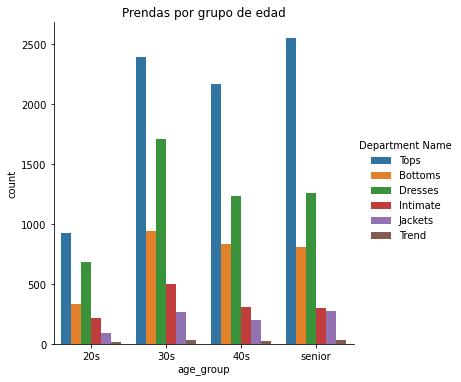

In [41]:
# Graf. Comentarios por tipo de prenda y grupo de edad
sns.catplot(data=train_dataset,
            x="age_group",  # si pinto en vertical 
           hue="Department Name",
           kind="count")
plt.title("Categorías de prendas por grupo de edad");

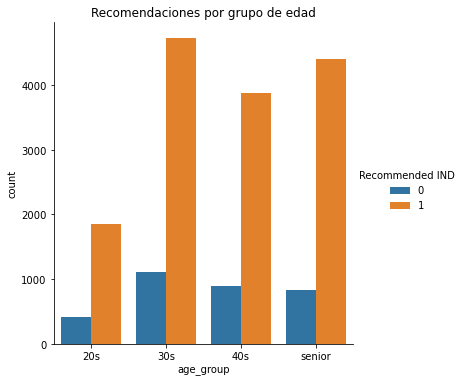

In [42]:
# Graf. Recomendaciones por grupo de edad
sns.catplot(data=train_dataset,
            x="age_group",  # si pinto en vertical 
            hue="Recommended IND",
            kind="count")
plt.title("Recomendaciones por grupo de edad");

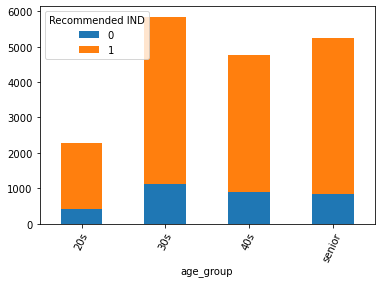

In [104]:
# Como el anterior, pero apilado
data=train_dataset.groupby(["age_group","Recommended IND"]).size().reset_index().pivot(columns='Recommended IND', index='age_group', values=0)

#data
data.plot(kind='bar', stacked=True)
plt.xticks(rotation=65);

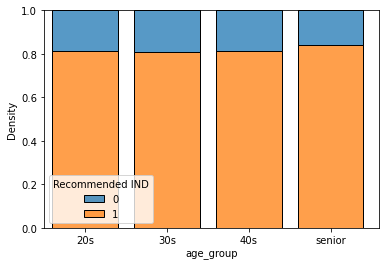

In [21]:
# nuevo porcentaje de recomendación por edad
sns.histplot(data=train_dataset, x="age_group", hue="Recommended IND", stat="density", multiple="fill", shrink=.8)

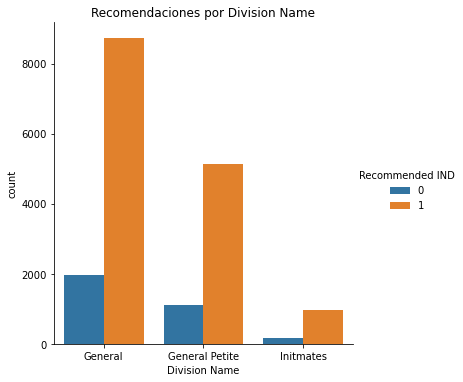

In [44]:
# Graf. Recomendaciones por categoría general
sns.catplot(data=train_dataset,
            x="Division Name",  # si pinto en vertical 
           hue="Recommended IND",
           kind="count")
plt.title("Recomendaciones por Division Name");

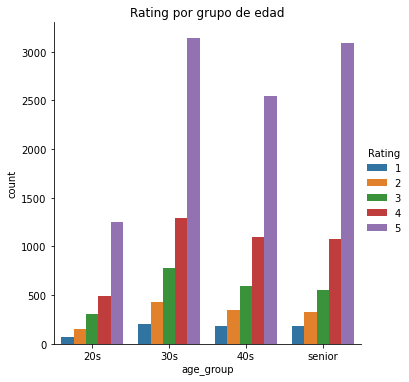

In [45]:
# Graf. Rating por grupo de edad
sns.catplot(data=train_dataset,
            x="age_group",  # si pinto en vertical 
           hue="Rating",
           kind="count")
plt.title("Rating por grupo de edad");

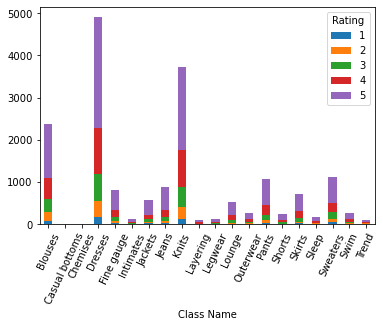

In [46]:
# Graf. ranking de categorías de prendas 

# preparo datos
data=train_dataset.groupby(["Class Name","Rating"]).size().reset_index().pivot(columns='Rating', index='Class Name', values=0)

#data
data.plot(kind='bar', stacked=True)
plt.xticks(rotation=65);

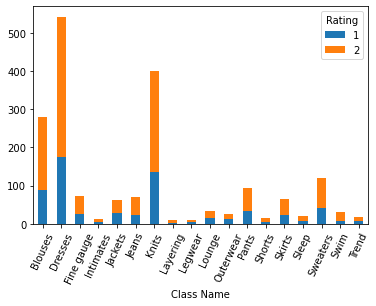

In [36]:
# nuevo
# Graf. ranking de categorías de prendas peor valoradas

# preparo datos
data_peor=train_dataset.loc[train_dataset["Rating"]<3]
data=data_peor.groupby(["Class Name","Rating"]).size().reset_index().pivot(columns='Rating', index='Class Name', values=0)

#data
data.plot(kind='bar', stacked=True)
plt.xticks(rotation=65);

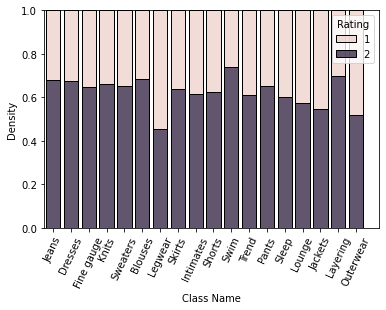

In [33]:
# nuevo porcentaje de prendas peor valoradas
sns.histplot(data=data_peor, x="Class Name", hue="Rating", stat="density", multiple="fill", shrink=.8, hue_order=data_peor['Rating'].value_counts().index)
plt.xticks(rotation=65);

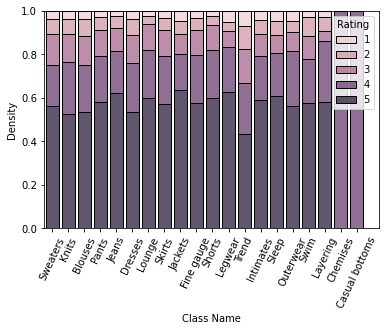

In [41]:
# nuevo porcentaje de prendas peor valoradas
sns.histplot(data=train_dataset, x="Class Name", hue="Rating", stat="density", hue_order=train_dataset['Class Name'].value_counts().index, multiple="fill", shrink=.8)
plt.xticks(rotation=65);

In [78]:
# nuevo
# datos de las prendas peor valoradas
train_dataset[train_dataset["Rating"]<3]["Class Name"].value_counts()*100/len(train_dataset)

Dresses       2.992326
Knits         2.213880
Blouses       1.540330
Sweaters      0.668028
Pants         0.524485
Fine gauge    0.408546
Jeans         0.380942
Skirts        0.353337
Jackets       0.342296
Lounge        0.182190
Swim          0.171148
Outerwear     0.138022
Sleep         0.110418
Trend         0.099376
Shorts        0.088334
Intimates     0.071772
Legwear       0.060730
Layering      0.055209
Name: Class Name, dtype: float64

In [94]:
# nuevo
# datos de las prendas mejor valoradas
prendas_mejor=train_dataset[train_dataset["Rating"]>3]["Class Name"].value_counts()
prendas_total=train_dataset["Class Name"].value_counts()

#df_prendas_mejor= pd.concat([prendas_mejor, prendas_total], axis=1)
df_prendas_mejores=pd.DataFrame(prendas_mejor,prendas_total,columns=['4 y 5 estrellas', 'todas'])
df_prendas_mejores

,4 y 5 estrellas,todas
Class Name,,
4905,NaN,NaN
3716,NaN,NaN
2381,NaN,NaN
1123,NaN,NaN
1076,NaN,NaN
880,NaN,NaN
818,NaN,NaN
718,NaN,NaN
573,NaN,NaN


In [107]:

p_prendas_mejor=pd.Series(prendas_mejor, index =["4 y 5"])
prendas_mejor

Dresses           3726
Knits             2835
Blouses           1783
Pants              854
Sweaters           842
Jeans              716
Fine gauge         653
Skirts             570
Jackets            459
Lounge             437
Outerwear          210
Swim               206
Shorts             197
Sleep              142
Legwear            101
Intimates           95
Layering            92
Trend               68
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64

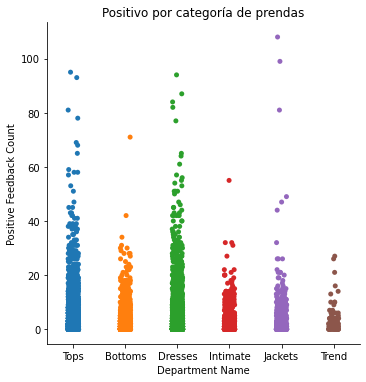

In [47]:
# Graf. Comentarios positivos por categoría de prendas
sns.catplot(data=train_dataset,
            x="Department Name",
            y="Positive Feedback Count")
plt.title("Positivo por categoría de prendas");

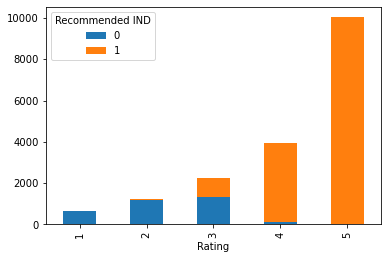

In [48]:
# gráfica: recomendaciones vs rating
df_plot = train_dataset.groupby(['Rating', 'Recommended IND']).size().reset_index().pivot(columns='Recommended IND', 
                                                                                  index='Rating', 
                                                                                  values=0)
df_plot.plot(kind='bar', stacked=True);

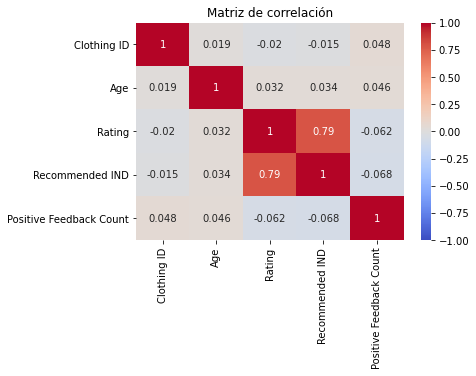

In [49]:
# gráfica: matriz de correlación
sns.heatmap(train_dataset.corr(),
           vmin=-1,
           vmax=1,
           annot=True,
           cmap = "coolwarm")
plt.title("Matriz de correlación");

## Conclusiones del análisis

1. **Las prendas**
Las prendas están categorizadas con tres distinciones: 
- "Division name", que diferencia entre prendas de talla standard, tallas pequeñas y ropa interior
- "Department name", categoría que engloba vestidos, ropa superior (tops), inferior (botons)...
- "Class name", sub-categoría con el tipo de prenda en sí: vestido, blusa, camiseta...

La categoría más popular son los tops y la prenda más mencionada los vestidos.

2. **Edades**
El rango va desde los 18 hasta los 99, aunque es de suponer que las edades más avanzadas son falsas, por lo que para facilitar el análisis de han hecho grupos de edades por décadas y a partir de 50 todas entran en el grupo "senior". El grupo más numeroso es el treintañero. 
Se puede observar las preferencias de cada década por una categoría de prenda. Los tops son los preferidos en todas las edades, sobre todo en 30 y senior. Los vestidos destacan entre las treintañeras.

3. **Recomendaciones y rating**
Las recomendaciones positivas superan abrumadoramente (82/18) a las negativas, siendo las principales recomendadoras las mujeres de 30, seguidas de las senior y las de 40. Las de 20 son bastante menos activas.
Como era de esperar, las prendas que obtienen 5 y 4 estrellas son recomendadas en su mayoría, las no recomendadas pertenecen a las estrellas 1 y 2. Con tres estrellas el procentaje de recomendación está equilibrado, aunque se inclina hacia la no recomendación.



## Nota
Para más información sobre las conclusiones del análisis, se recomienda leer el fichero pdf publicado en esta misma carpeta de git.
